In [1]:
import pandas as pd

In [64]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.metrics import confusion_matrix,f1_score
%matplotlib inline

def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
    plt.ylabel('Label')
    plt.xlabel('Prediction')

In [3]:
eeg=pd.read_csv("../datasets/eeg.csv")


In [4]:
eeg

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Class
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,1
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,1
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,1
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,1
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14971,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,2
14972,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,2
14973,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,2
14974,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,2


In [6]:
y=eeg["Class"]
x=eeg.drop(["Class"],axis=1)

In [7]:
x.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
count,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000
mean,4301.378607,4009.507626,4264.083569,4122.377696,4341.561287,4620.060675,4072.823013,4615.788517,4201.341742,4231.202968,4202.150055,4279.089914,4606.009665,4361.304558
std,37.770271,30.087356,21.335365,20.929477,17.007343,18.517252,20.910175,18.341333,17.841047,19.765889,24.475270,20.093956,33.405176,38.472996
min,4197.950000,3905.640000,4197.440000,4058.460000,4304.620000,4566.150000,4026.150000,4567.180000,4147.690000,4152.820000,4100.000000,4201.030000,4443.080000,4205.640000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000
max,4504.100000,4156.920000,4386.150000,4250.260000,4463.590000,4756.920000,4178.460000,4731.790000,4320.000000,4362.560000,4332.310000,4397.950000,4833.850000,4573.330000


In [8]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46


In [9]:
from sklearn.model_selection import train_test_split


In [33]:
from sklearn import preprocessing

temp =x.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(temp)
x_norm = pd.DataFrame(x_scaled)
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.2)


In [34]:
x_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.428809,0.412249,0.486408,0.467935,0.287098,0.104838,0.464644,0.448636,0.431548,0.408315,0.479015,0.403616,0.493436,0.511871
1,0.413751,0.393903,0.510890,0.470594,0.235453,0.107564,0.468059,0.436122,0.366084,0.352103,0.463562,0.398436,0.485554,0.485355
2,0.423779,0.402061,0.518997,0.510688,0.203183,0.091419,0.464644,0.383209,0.348210,0.330075,0.459171,0.411436,0.475062,0.499306
3,0.427144,0.422437,0.524456,0.508029,0.245141,0.086020,0.468059,0.386307,0.404794,0.393630,0.476820,0.440077,0.484249,0.518834
4,0.418749,0.422437,0.502729,0.483942,0.270932,0.107564,0.457948,0.367596,0.366084,0.435205,0.485644,0.442718,0.485554,0.524409


In [35]:
from sklearn.neural_network import MLPClassifier

In [60]:
clf = MLPClassifier(solver='lbfgs', alpha=0.1,hidden_layer_sizes=(128,64,32,16),tol=10e-10, random_state=1,verbose=True,max_iter=10000,warm_start=False,batch_size=32)

In [61]:
clf.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.1, batch_size=32, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(128, 64, 32, 16), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=1e-09, validation_fraction=0.1, verbose=True,
       warm_start=False)

In [62]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))

Test Accuracy  0.9539385847797063
Train Accuracy  0.9767027748924173


0.9601846508944029

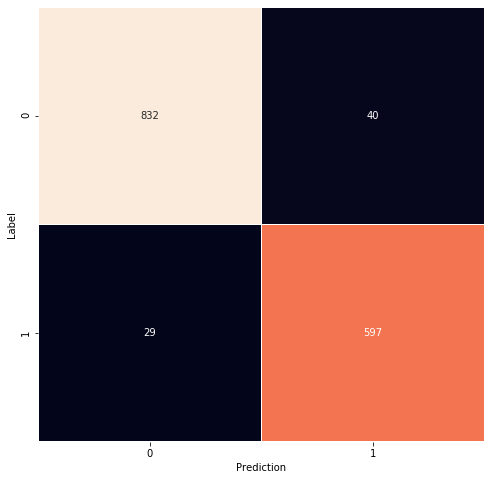

In [65]:
plot_confusion_matrix(y_test,clf.predict(x_test))
f1_score(y_test,clf.predict(x_test))

In [66]:
from sklearn.svm import SVC 
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.1)

In [67]:
clf=SVC(kernel='rbf')

In [68]:
clf.fit(x_train,y_train,)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Test Accuracy  0.6081441922563418
Train Accuracy  0.6330316070633625


0.7143552311435523

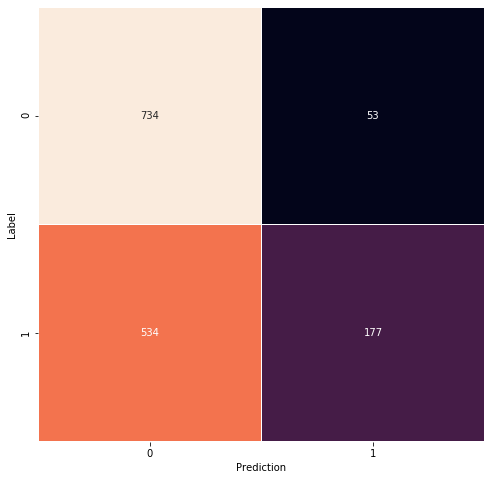

In [69]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))
plot_confusion_matrix(y_test,clf.predict(x_test))
f1_score(y_test,clf.predict(x_test))

In [70]:
from sklearn.linear_model import SGDClassifier
clf=SGDClassifier(alpha=0.01,loss="log",verbose=1,max_iter=100)

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.1)

In [72]:
clf.fit(x_train,y_train)

-- Epoch 1
Norm: 1.08, NNZs: 14, Bias: -0.593054, T: 13478, Avg. loss: 0.683771
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.08, NNZs: 14, Bias: -0.583064, T: 26956, Avg. loss: 0.673696
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.09, NNZs: 14, Bias: -0.561387, T: 40434, Avg. loss: 0.673425
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.08, NNZs: 14, Bias: -0.597916, T: 53912, Avg. loss: 0.673218
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 1.09, NNZs: 14, Bias: -0.562201, T: 67390, Avg. loss: 0.673343
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 1.08, NNZs: 14, Bias: -0.572757, T: 80868, Avg. loss: 0.673175
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 1.09, NNZs: 14, Bias: -0.558785, T: 94346, Avg. loss: 0.673071
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 1.08, NNZs: 14, Bias: -0.577610, T: 107824, Avg. loss: 0.672986
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 1.08, NNZs: 14, Bias: -0.579308, T: 121302, Avg. loss: 0.67309

Norm: 1.09, NNZs: 14, Bias: -0.569463, T: 1307366, Avg. loss: 0.672868
Total training time: 0.20 seconds.
-- Epoch 98
Norm: 1.09, NNZs: 14, Bias: -0.569017, T: 1320844, Avg. loss: 0.672873
Total training time: 0.20 seconds.
-- Epoch 99
Norm: 1.09, NNZs: 14, Bias: -0.570381, T: 1334322, Avg. loss: 0.672858
Total training time: 0.21 seconds.
-- Epoch 100
Norm: 1.09, NNZs: 14, Bias: -0.570548, T: 1347800, Avg. loss: 0.672869
Total training time: 0.21 seconds.


SGDClassifier(alpha=0.01, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=100, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=1, warm_start=False)

Test Accuracy  0.582109479305741
Train Accuracy  0.5858435969728446


0.7167420814479638

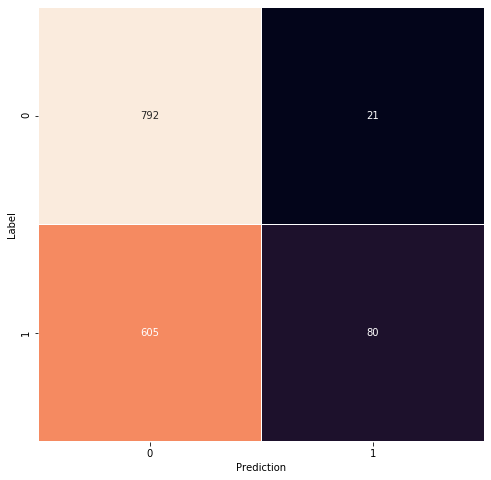

In [73]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))
plot_confusion_matrix(y_test,clf.predict(x_test))
f1_score(y_test,clf.predict(x_test))

In [75]:
from sklearn.neighbors import NearestCentroid

In [76]:
clf=NearestCentroid()

In [77]:
clf.fit(x_train,y_train)

NearestCentroid(metric='euclidean', shrink_threshold=None)

Test Accuracy  0.5614152202937249
Train Accuracy  0.572414304792996


0.6128461991750148

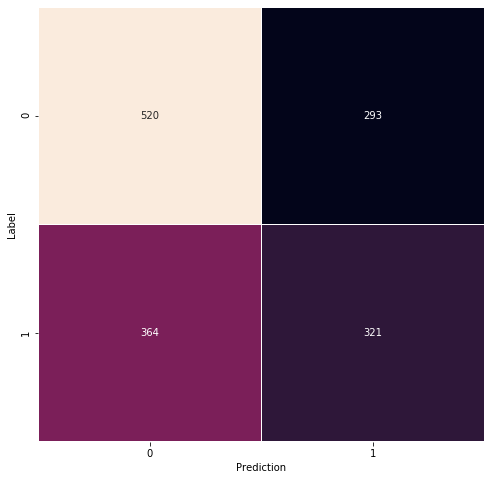

In [78]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))
plot_confusion_matrix(y_test,clf.predict(x_test))
f1_score(y_test,clf.predict(x_test))

In [79]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()          

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.2)

In [81]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Test Accuracy  0.832109479305741
Train Accuracy  1.0


0.8453735013833383

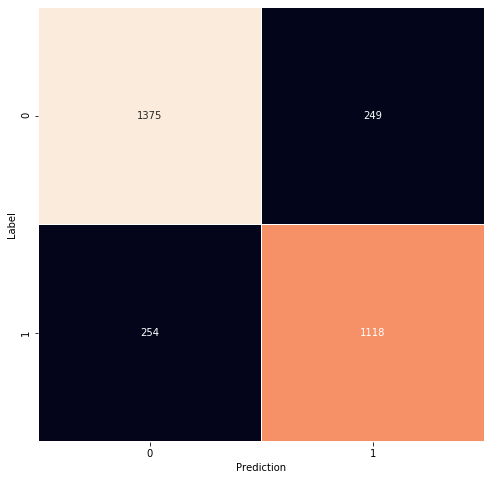

In [82]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))
plot_confusion_matrix(y_test,clf.predict(x_test))
f1_score(y_test,clf.predict(x_test))

In [83]:
from xgboost import XGBClassifier 

/home/daniyal/.local/lib/python3.6/site-packages/dask/dataframe/utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [84]:
clf=XGBClassifier()

In [85]:
clf.fit(x_train, y_train,eval_set=[(x_train, y_train), (x_test, y_test)],eval_metric='logloss',verbose=True)

evals_result = clf.evals_result()

[0]	validation_0-logloss:0.60772	validation_1-logloss:0.61908
[1]	validation_0-logloss:0.55237	validation_1-logloss:0.56942
[2]	validation_0-logloss:0.50919	validation_1-logloss:0.53204
[3]	validation_0-logloss:0.47296	validation_1-logloss:0.50203
[4]	validation_0-logloss:0.44454	validation_1-logloss:0.47648
[5]	validation_0-logloss:0.42366	validation_1-logloss:0.45990
[6]	validation_0-logloss:0.41048	validation_1-logloss:0.44926
[7]	validation_0-logloss:0.40271	validation_1-logloss:0.44350
[8]	validation_0-logloss:0.37746	validation_1-logloss:0.42200
[9]	validation_0-logloss:0.36282	validation_1-logloss:0.40977
[10]	validation_0-logloss:0.35056	validation_1-logloss:0.40133
[11]	validation_0-logloss:0.34172	validation_1-logloss:0.39498
[12]	validation_0-logloss:0.32926	validation_1-logloss:0.38482
[13]	validation_0-logloss:0.31984	validation_1-logloss:0.37634
[14]	validation_0-logloss:0.30692	validation_1-logloss:0.36519
[15]	validation_0-logloss:0.29444	validation_1-logloss:0.35546
[1

Test Accuracy  0.92456608811749
Train Accuracy  0.9934056761268781


/home/daniyal/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/daniyal/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/daniyal/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/daniyal/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

0.9307173513182097

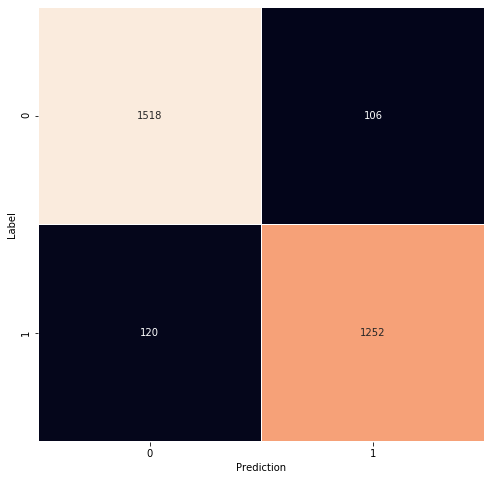

In [86]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))
plot_confusion_matrix(y_test,clf.predict(x_test))
f1_score(y_test,clf.predict(x_test))